## Name and ID

Ercan Sen, 1226073

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](https://piazza.com/class/k0grsypt15j73g).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [3]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [16]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list
n_runs = 16
models_relu = list()

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    models_relu.append((mlp_lbfgs, elapsed_time_sec))
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        (i+1), n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))


finished LBFGS run  1/16 after    0.1 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  2/16 after    0.0 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  3/16 after    0.0 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.0 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  6/16 after    0.0 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.0 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.0 sec |  15 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.0 sec |  26 iters | converged    | loss 0.000
finished LBFGS run 11/16 after    0.0 sec |  36 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.0 sec |  27 iters | converged    | loss 0.477
finished LBFGS r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

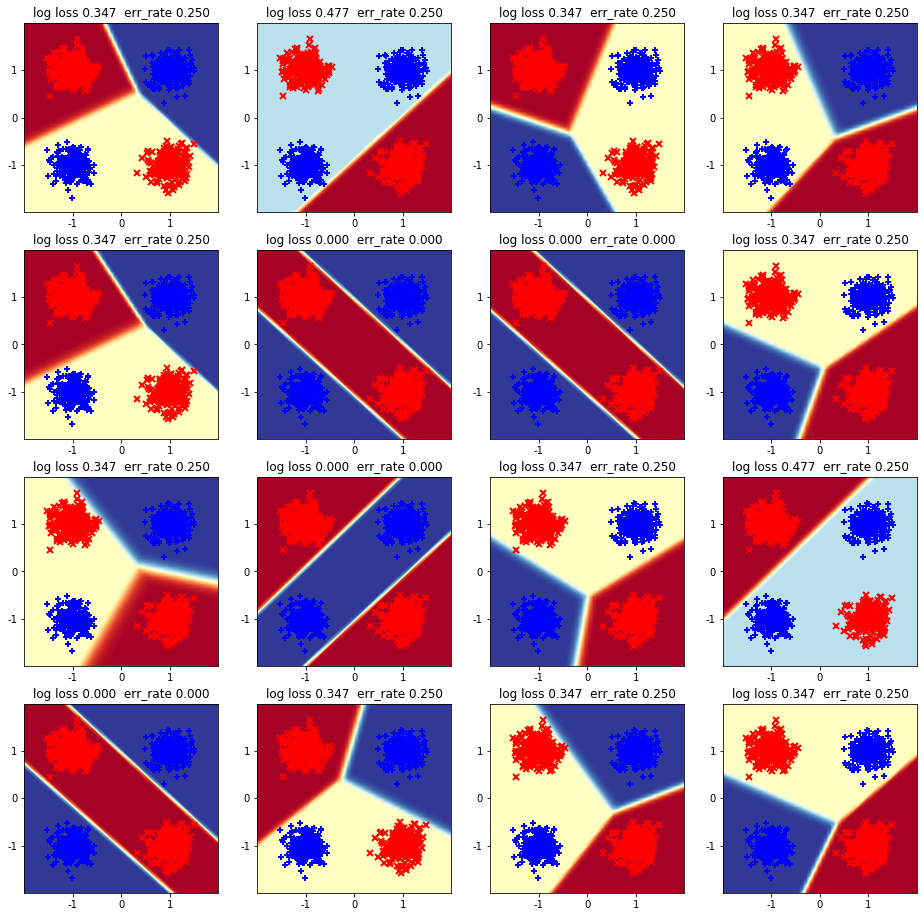

In [17]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(models_relu[4*i+j][0], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 1/4 of the runs reach 0 training error. The others all have an error rate of 25%. It is because the model fails to make a definite decision on certain points, because of the random state that determines the order of input points. Runs 2 & 12 can make a definite red classification on red points on corner, while all the remaining points are classified as blue with less certainty (represented by a light shade of blue) due to the greater number of blue datapoints in that region, but .25 error due to red points over there. The remaining errored cases correctly classify half of the red and blue datapoints, while not being able to come to a definite conclusion on the remaining datapoints. Hence, only half of the points in this "gray area" (represented as yellow in this color scheme) are correctly classfied, resulting in a .25 error rate. It should also be noted that those with 0 training error all have a loss of 0 as well. Things converge very fast, with number of iterations ranging between 15-39 and total running time fewer than 0.1 seconds for all 16 runs.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [18]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation
# Save each run's trained classifier object in a list

n_runs = 16
models_log = list()

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    models_log.append((mlp_lbfgs, elapsed_time_sec))
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        (i+1), n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))


finished LBFGS run  1/16 after    0.1 sec |  56 iters | converged    | loss 0.000
finished LBFGS run  2/16 after    0.1 sec | 121 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.0 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.1 sec |  75 iters | converged    | loss 0.000
finished LBFGS run  5/16 after    0.0 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  6/16 after    0.0 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.0 sec |  14 iters | converged    | loss 0.537
finished LBFGS run  9/16 after    0.1 sec |  61 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.1 sec | 118 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    0.1 sec |  66 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.1 sec |  95 iters | converged    | loss 0.347
finished LBFGS r

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

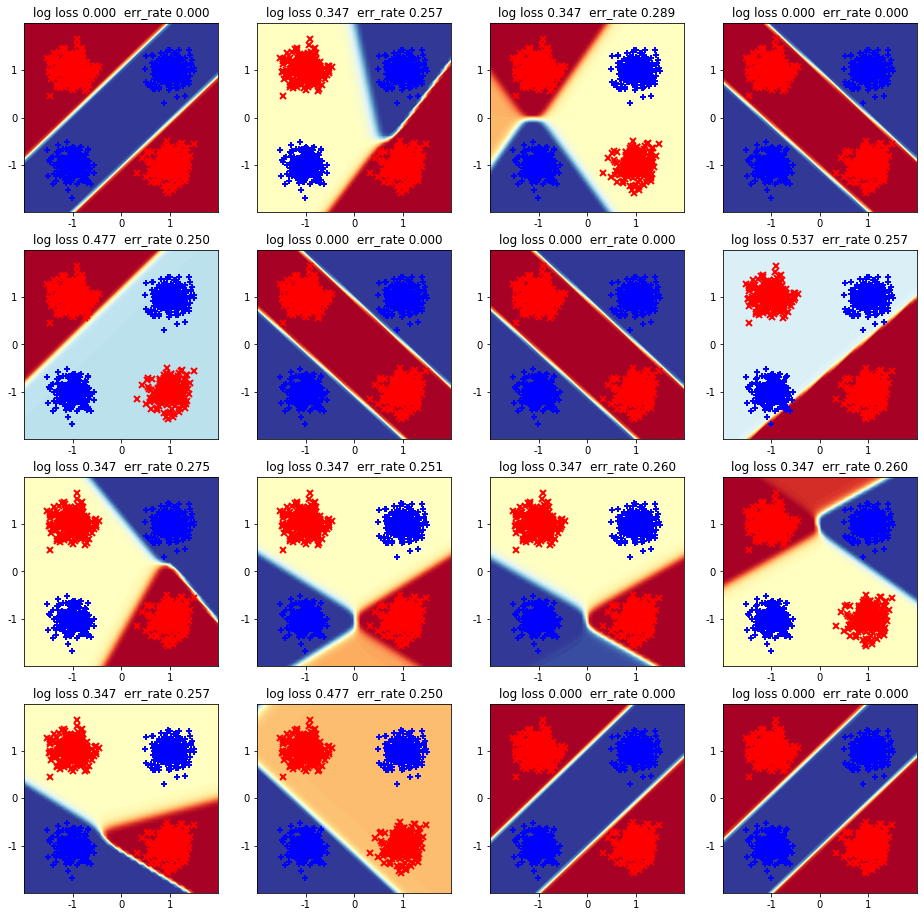

In [19]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(models_log[4*i+j][0], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 3/8 of the runs reach 0 training error. Similar to the previous case (with ReLU activation), these are the ones that have 0 loss. The remaining cases have error rates ranging between 0.250-0.289. These errors all have similar reasons to those explained for ReLU: due to the order of inputs (possibly, there was not many input points from some regions during earlier iterations), models fail to make a certain conclusion on some regions, and some of those points in the "gray zones" end up being classified incorrectly. Compared to the ReLU-activated models, logistic-activated models converge slightly slower with a maximum number of 121 iteration, although they still conver quite fast with none of them taking longer than 0.1 seconds.

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [21]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

n_runs = 16
models_sgd = list()

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    models_sgd.append((mlp_sgd, elapsed_time_sec))
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        (i+1), n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))


finished SGD run  1/16 after    7.0 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after    7.9 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after    7.0 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after   16.8 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after    9.2 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after   12.9 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   13.2 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after    8.8 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    7.0 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after   13.4 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after   17.8 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after   13.6 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

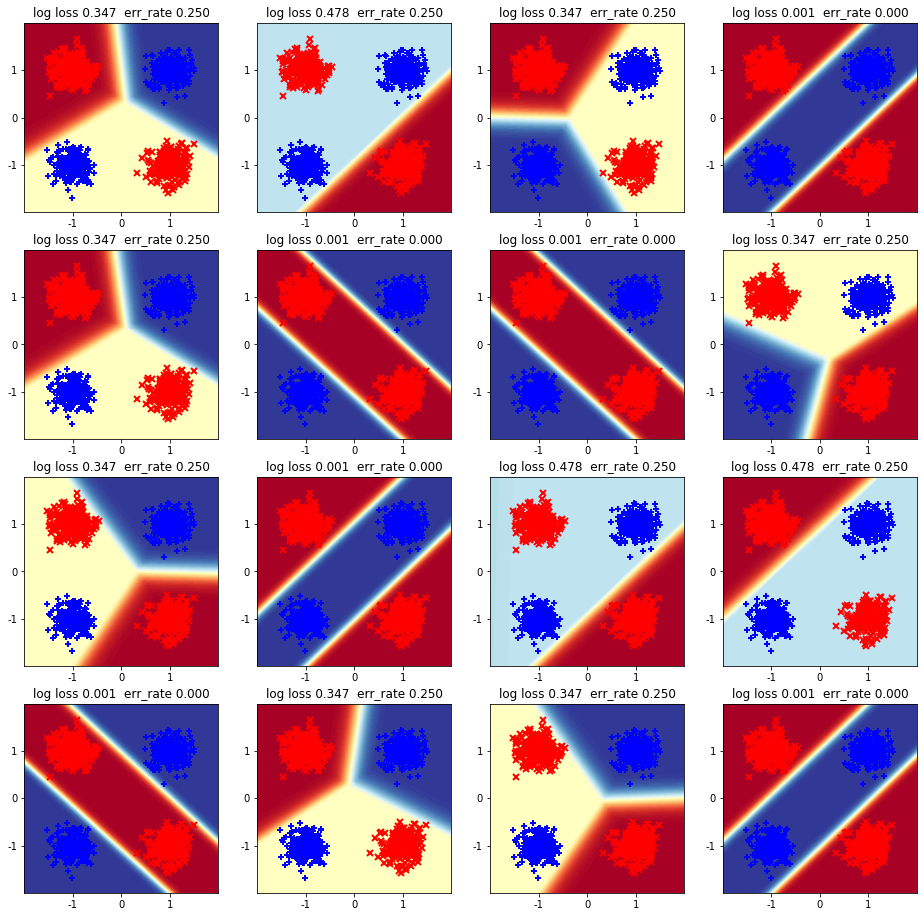

In [22]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(models_sgd[4*i+j][0], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 3/8 of runs reach 0 training error. Yet, when checked for their convergence after 400 epochs, we see that those models without error have not converged, although having a loss of 0.001. The remaining cases all have an error rate of 0.250. Compared to the other cases we had analyzed, the models in this case converged much slower, with running times ranging between 7-17.8 seconds.

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: The most noticeable differences between SGD and L-BFGS optimized models that both use ReLU activation are runtime and convergence. SGD models took much longer to converge with 7/16 not converging, while L-BFGS models converged very rapidly and all the models were able to converge. Since SGD is a more elementary method of optimization, it might be the reason why its speed of convergence is slower. Yet, a greater ratio of SGD models were able to reach 0 error on training than L-BFGS models. We can deduce that, although slower to converge, SGD optimization results in more accurate classifications.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [26]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation
n_runs = 16
models_sgd_log = list()

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    models_sgd_log.append((mlp_sgd, elapsed_time_sec))
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        (i+1), n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))


finished SGD run  1/16 after    3.5 sec | 161 epochs | converged     | loss 0.693
finished SGD run  2/16 after    8.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after    8.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  4/16 after    4.5 sec | 215 epochs | converged     | loss 0.693
finished SGD run  5/16 after    8.6 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  6/16 after    8.8 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after    8.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  8/16 after    8.5 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after    8.3 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after    8.3 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 11/16 after    2.6 sec | 124 epochs | converged     | loss 0.693
finished SGD run 12/16 after    8.6 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

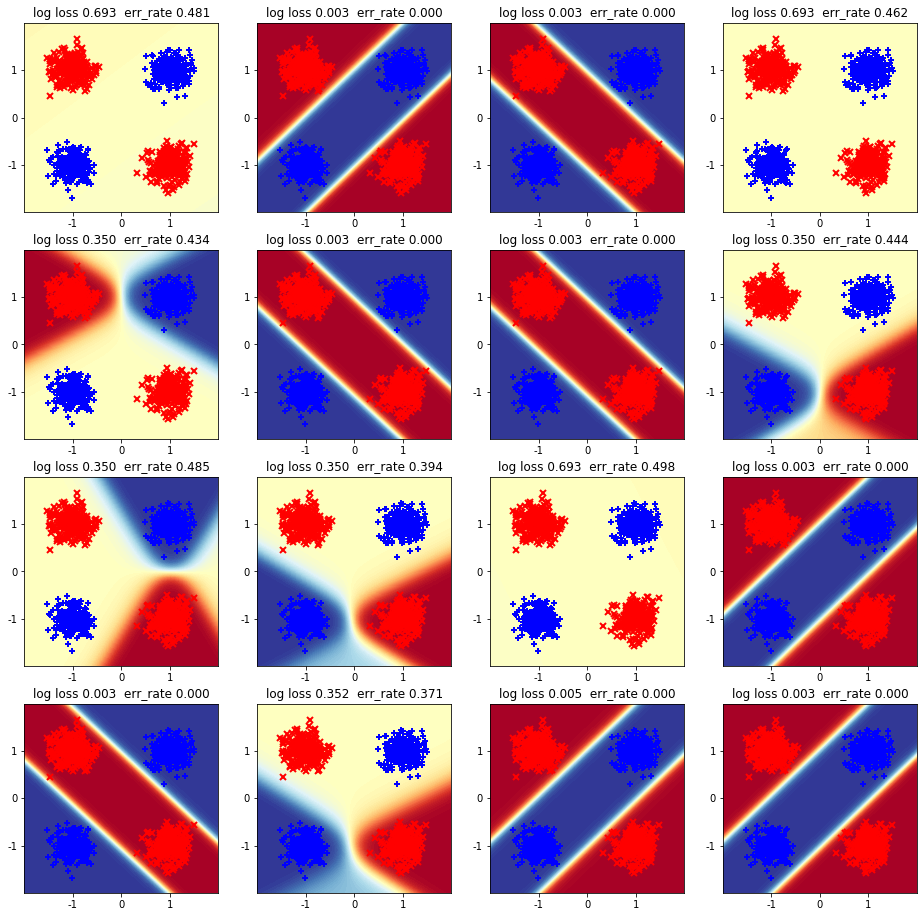

In [27]:
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(models_sgd_log[4*i+j][0], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 2/3 of the runs reach 0 training error. The remaining ones result in some error classifications, error rates ranging between 0.371-0.498. Here (Logistic + SGD), running times are slighly less than those in ReLU + SGD, but they are still high with most of the around 8 seconds per run, so we can deduce that convergence is slow.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: Again, speed and state of convergence is a major difference. Those with SGD optimization almost never converged and were slow, while all of those with L-BFGS optimization converged and were rapid. However, we also see that SGD models were much more likely to result in a low error rate. Hence, although takes more time, using SGD optimization seems to be more effective.

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

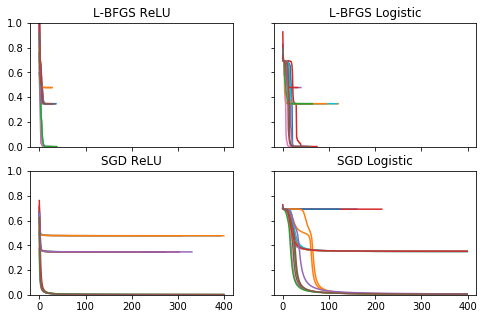

In [31]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
for m in models_relu:
    ax_grid[0,0].plot(m[0].loss_curve_)

ax_grid[0,1].set_title('L-BFGS Logistic')
for m in models_log:
    ax_grid[0,1].plot(m[0].loss_curve_)

ax_grid[1,0].set_title('SGD ReLU')
for m in models_sgd:
    ax_grid[1,0].plot(m[0].loss_curve_)
    
ax_grid[1,1].set_title('SGD Logistic')
for m in models_sgd_log:
    ax_grid[1,1].plot(m[0].loss_curve_)
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** ReLU seems to be the activation function that is easier to optimize. All the loss curves for ReLU start from a high point and reach a plateau upon early iterations in a smooth manner. On the other hand, Logistic Sigmoid loss curves do not tend to reach their optimal plateau as quickly. Also, they do not tend to reach that plateau as smoothly (as ReLU does), i.e. they decrease down to their plateau in a step-by-step manner. If we compare these two activation functions (keeping optimization method constant, i.e. checking row-by-row), we also see that Logistic Sigmoid requires more iterations. To conclude, ReLU is easier to optimize.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: Only the experimental conditions we had tested allowed us to make this conclusion. Yet, in order to make a stronger claim that ReLU is always easier to optimize than Logistic Sigmoid, we need to try out some additional conditions. Three additional experimental comparisons that would be informative are:
    1) Trying out various increasing values for number of hidden layers other than 2
    2) Trying out higher maximum number of iterations, as there were cases that did not converge
    3) Trying out different learning rates